## Importing required packages

In [1]:
from bitcoin_deep_learning.call_api import ApiCall
from bitcoin_deep_learning.model import RnnDlModel, LinearRegressionBaselineModel, DummyModel
from bitcoin_deep_learning.trainer import train, read_result
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
from random import random
import joblib
%load_ext autoreload
%autoreload 2

## Getting the data

In [2]:
train_df = ApiCall().read_local(data='train')#.drop(columns = '[%]_Bitcoin_growth_rate_on_Horizon=7')

## Data viz exploration

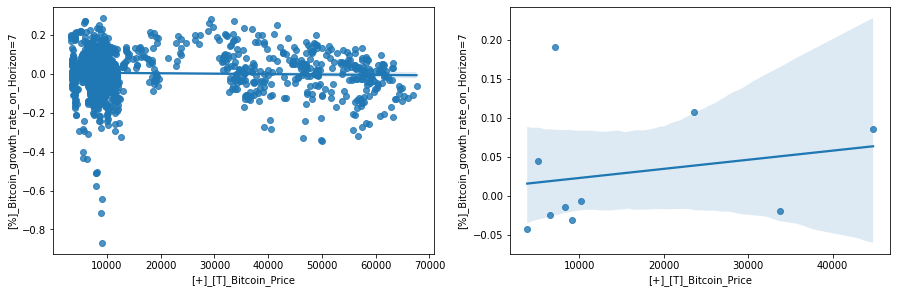

In [3]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.regplot(x='[+]_[T]_Bitcoin_Price', y='[%]_Bitcoin_growth_rate_on_Horizon=7', data=train_df, ci=95)
plt.subplot(2,2,2)
sns.regplot(x='[+]_[T]_Bitcoin_Price', y='[%]_Bitcoin_growth_rate_on_Horizon=7', data=train_df.sample(10, random_state=6), ci=95);

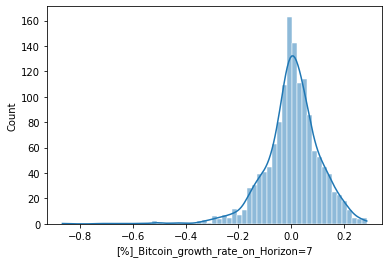

In [4]:
sns.histplot(train_df['[%]_Bitcoin_growth_rate_on_Horizon=7'], kde=True, edgecolor='w');

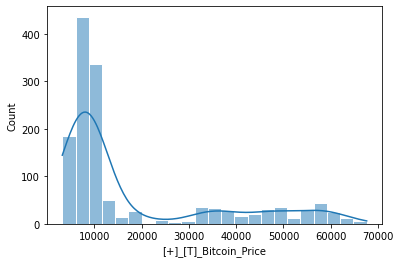

In [5]:
sns.histplot(train_df['[+]_[T]_Bitcoin_Price'], kde=True, edgecolor='w');

In [6]:
train_df['[%]_Bitcoin_growth_rate_on_Horizon=7'].std()

0.10899637284583642

In [7]:
train_df['[%]_Bitcoin_growth_rate_on_Horizon=7'].mean()

0.003258745217498152

## Exploration of coefficients

In [8]:
train_df = ApiCall().read_local(data='train')#.drop(columns = '[%]_Bitcoin_growth_rate_on_Horizon=7')

In [9]:
train_df['[+]_[T]_Bitcoin_Price'].std()

17639.047390851847

In [10]:
train_df['[+]_[T]_Bitcoin_Price'].mean()

17958.009932393972

In [11]:
train_df.head(20)

,date,[AVG]_[NH]_mean_hash_rate,[+]_[NH]_Days_Till_Halving,[//]_[AV]_Stock-to-Flow_Ratio,[+]_[NH]_Circulating_Supply,[+]_[NH]_Issuance,[+]_[NH]_Number_of_Active_Addresses,[+]_[NH]_Mean_Block_Interval,[+]_[NH]_Number_of_Transactions,[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_Balance,...,[%]_Bitcoin_growth_rate_on_Horizon=7,fear_greed_value,[+]_[NH]_Number_of_Addresses_with_Balance_0.01 - 0.1,[+]_[NH]_Number_of_Addresses_with_Balance_0.1 - 1,[+]_[NH]_Number_of_Addresses_with_Balance_1 - 10,[+]_[NH]_Number_of_Addresses_with_Balance_10 - 100,[+]_[NH]_Number_of_Addresses_with_Balance_100 - 1k,[+]_[NH]_Number_of_Addresses_with_Balance_1k - 10k,[+]_[T]_Bitcoin_Price,[%]_Bitcoin_growth_rate_on_Horizon=7.1
0,2018-02-01,2.054109e+19,830,5642.903220,16839700.0,2000.0,842398,377,257504,27026398,...,-0.096230,30,4226306,1722331,544769,132314,15779,1529,9014.026207,-0.096230
1,2018-02-02,2.170824e+19,829,5641.695528,16841800.0,2100.0,854253,385,235750,26955617,...,-0.013968,15,4198274,1704275,543489,132213,15815,1521,8799.121911,-0.013968
2,2018-02-03,2.073919e+19,828,5641.015128,16843775.0,1975.0,714655,384,194733,26886977,...,-0.078603,40,4173275,1692828,542447,132021,15812,1523,9208.459919,-0.078603
3,2018-02-04,2.280248e+19,827,5632.191528,16846000.0,2225.0,720904,349,173509,26753036,...,-0.012779,24,4103680,1674480,540698,132009,15830,1532,8176.460616,-0.012779
4,2018-02-05,2.411984e+19,826,5626.186626,16848312.5,2312.5,903239,338,216178,26562089,...,0.224166,11,4036425,1668996,541030,131987,15813,1519,6891.934414,0.224166
5,2018-02-06,2.199977e+19,825,5613.582892,16850437.5,2125.0,999110,358,243950,26426352,...,0.094468,8,4034268,1663664,537892,131953,15822,1525,7714.392057,0.094468
6,2018-02-07,2.004877e+19,824,5619.041374,16852200.0,1762.5,814500,453,213578,26340551,...,0.201176,36,4024022,1659967,538766,131816,15782,1521,7575.611197,0.201176
7,2018-02-08,1.876627e+19,823,5626.039833,16853837.5,1637.5,746341,435,173158,26217915,...,0.182946,30,4010185,1662072,539783,131822,15806,1527,8222.753649,0.182946
8,2018-02-09,1.919364e+19,822,5639.520131,16855525.0,1687.5,775346,483,177725,26145417,...,0.152258,44,4006306,1666049,540436,131315,15745,1529,8677.910527,0.152258
9,2018-02-10,2.043647e+19,821,5643.008314,16857312.5,1787.5,741833,426,181640,26044328,...,0.230983,54,3992860,1670898,539736,131438,15733,1533,8537.393208,0.230983


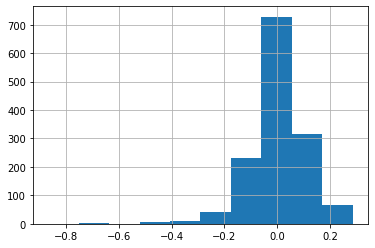

In [12]:
train_df['[%]_Bitcoin_growth_rate_on_Horizon=7.1'].hist();

In [13]:
model = LinearRegressionBaselineModel()

In [14]:
train(model, train_df)


 22%|█████████▋                                  | 7/32 [00:00<00:00, 30.76it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 34%|██████████████▊                            | 11/32 [00:00<00:00, 31.59it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 59%|█████████████████████████▌                 | 19/32 [00:00<00:00, 32.99it/s]

[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 84%|████████████████████████████████████▎      | 27/32 [00:00<00:00, 33.53it/s]

[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]
[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.67it/s]

[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


([825.38041,
  688.86639,
  208.91283,
  156.25223,
  101.09904,
  143.12482,
  122.33834,
  233.7399,
  166.37505,
  187.29547,
  148.66585,
  103.4312,
  106.59962,
  99.69765,
  158.60034,
  134.2105,
  131.08586,
  104.50463,
  113.23964,
  96.53568,
  96.74521,
  100.41657,
  115.50385,
  158.51181,
  134.36696,
  163.44959,
  238.69039,
  247.44283,
  203.99918,
  216.55892,
  151.44572,
  157.48271],
 187.95529)

In [25]:
model.model.coef_

array([-0.,  0., -0., -0., -0., -0., -0.,  0., -0.,  0.,  0., -0., -0.,
       -0.,  0., -0.,  0., -0., -0.,  0., -0., -0., -0.,  0.,  0., -0.,
       -0.,  0.,  0., -0.,  0., -0.,  0.])

bucket_list = ['date',
                '[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_Balance',
               '[+]_[NH]_Number_of_Addresses_with_Balance_≥_10k',
               '[+]_[NH]_Number_of_Addresses_with_Balance_0.01 - 0.1',
               '[+]_[NH]_Number_of_Addresses_with_Balance_0.1 - 1',
               '[+]_[NH]_Number_of_Addresses_with_Balance_1 - 10',
               '[+]_[NH]_Number_of_Addresses_with_Balance_10 - 100',
             '[+]_[NH]_Number_of_Addresses_with_Balance_100 - 1k',
               '[+]_[NH]_Number_of_Addresses_with_Balance_1k - 10k']


In [15]:
train_df_nodates = train_df.copy().drop(columns = 'date')#.drop(columns = bucket_list)
train_df_nodates

,[AVG]_[NH]_mean_hash_rate,[+]_[NH]_Days_Till_Halving,[//]_[AV]_Stock-to-Flow_Ratio,[+]_[NH]_Circulating_Supply,[+]_[NH]_Issuance,[+]_[NH]_Number_of_Active_Addresses,[+]_[NH]_Mean_Block_Interval,[+]_[NH]_Number_of_Transactions,[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_Balance,[+]_[NH]_Number_of_Addresses_with_Balance_≥_10k,...,[%]_Bitcoin_growth_rate_on_Horizon=7,fear_greed_value,[+]_[NH]_Number_of_Addresses_with_Balance_0.01 - 0.1,[+]_[NH]_Number_of_Addresses_with_Balance_0.1 - 1,[+]_[NH]_Number_of_Addresses_with_Balance_1 - 10,[+]_[NH]_Number_of_Addresses_with_Balance_10 - 100,[+]_[NH]_Number_of_Addresses_with_Balance_100 - 1k,[+]_[NH]_Number_of_Addresses_with_Balance_1k - 10k,[+]_[T]_Bitcoin_Price,[%]_Bitcoin_growth_rate_on_Horizon=7.1
0,2.054109e+19,830,5642.903220,16839700.00,2000.00,842398,377,257504,27026398,110,...,-0.096230,30,4226306,1722331,544769,132314,15779,1529,9014.026207,-0.096230
1,2.170824e+19,829,5641.695528,16841800.00,2100.00,854253,385,235750,26955617,110,...,-0.013968,15,4198274,1704275,543489,132213,15815,1521,8799.121911,-0.013968
2,2.073919e+19,828,5641.015128,16843775.00,1975.00,714655,384,194733,26886977,110,...,-0.078603,40,4173275,1692828,542447,132021,15812,1523,9208.459919,-0.078603
3,2.280248e+19,827,5632.191528,16846000.00,2225.00,720904,349,173509,26753036,110,...,-0.012779,24,4103680,1674480,540698,132009,15830,1532,8176.460616,-0.012779
4,2.411984e+19,826,5626.186626,16848312.50,2312.50,903239,338,216178,26562089,111,...,0.224166,11,4036425,1668996,541030,131987,15813,1519,6891.934414,0.224166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,1.721920e+20,878,107737.780008,18889393.75,968.75,1181761,328,313106,39158781,91,...,-0.178192,32,6027671,2469393,662715,132302,13946,2058,56448.448681,-0.178192
1401,1.895333e+20,877,107683.375209,18890443.75,1050.00,1009846,335,289971,39196439,92,...,-0.137606,31,6033537,2468409,663251,132374,13950,2057,53765.796483,-0.137606
1402,1.690595e+20,876,107627.370170,18891412.50,968.75,966373,365,253519,39269124,90,...,0.007926,25,6045160,2473113,664015,132441,13979,2061,48962.920993,0.007926
1403,1.869669e+20,875,107497.322411,18892450.00,1037.50,966666,342,215047,39150342,90,...,0.018836,18,6056667,2476280,664358,132558,13969,2067,49174.902908,0.018836


In [16]:
train_df_nodates_scaled = train_df_nodates.copy()

for feature in train_df_nodates_scaled.columns:
    mu = train_df_nodates[feature].mean()
    sigma = train_df_nodates[feature].std()
    train_df_nodates_scaled[feature] = train_df_nodates_scaled[feature].apply(lambda x: (x-mu)/sigma)
    
train_df_nodates_scaled

,[AVG]_[NH]_mean_hash_rate,[+]_[NH]_Days_Till_Halving,[//]_[AV]_Stock-to-Flow_Ratio,[+]_[NH]_Circulating_Supply,[+]_[NH]_Issuance,[+]_[NH]_Number_of_Active_Addresses,[+]_[NH]_Mean_Block_Interval,[+]_[NH]_Number_of_Transactions,[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_Balance,[+]_[NH]_Number_of_Addresses_with_Balance_≥_10k,...,[%]_Bitcoin_growth_rate_on_Horizon=7,fear_greed_value,[+]_[NH]_Number_of_Addresses_with_Balance_0.01 - 0.1,[+]_[NH]_Number_of_Addresses_with_Balance_0.1 - 1,[+]_[NH]_Number_of_Addresses_with_Balance_1 - 10,[+]_[NH]_Number_of_Addresses_with_Balance_10 - 100,[+]_[NH]_Number_of_Addresses_with_Balance_100 - 1k,[+]_[NH]_Number_of_Addresses_with_Balance_1k - 10k,[+]_[T]_Bitcoin_Price,[%]_Bitcoin_growth_rate_on_Horizon=7.1
0,-1.576489,0.258091,-0.636056,-1.934437,1.089143,0.163858,-0.626734,-0.427152,-0.324974,0.467485,...,-0.912768,-0.726114,-0.892840,-1.346137,-1.643225,-0.751334,2.155157,-1.711352,-0.507056,-0.912768
1,-1.550767,0.255731,-0.636089,-1.931022,1.292048,0.226219,-0.499660,-0.809081,-0.337222,0.467485,...,-0.158047,-1.384698,-0.930924,-1.414544,-1.671221,-0.786278,2.210251,-1.746179,-0.519239,-0.158047
2,-1.572123,0.253372,-0.636108,-1.927810,1.038417,-0.508115,-0.515544,-1.529206,-0.349100,0.467485,...,-0.751052,-0.287058,-0.964888,-1.457913,-1.694012,-0.852705,2.205660,-1.737472,-0.496033,-0.751052
3,-1.526653,0.251013,-0.636348,-1.924191,1.545680,-0.475243,-1.071495,-1.901831,-0.372278,0.467485,...,-0.147138,-0.989547,-1.059441,-1.527427,-1.732267,-0.856857,2.233207,-1.698292,-0.554540,-0.147138
4,-1.497621,0.248654,-0.636512,-1.920430,1.723222,0.483903,-1.246222,-1.152702,-0.405321,0.556739,...,2.026737,-1.560320,-1.150814,-1.548204,-1.725005,-0.864468,2.207190,-1.754886,-0.627362,2.026737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,1.765589,0.371327,2.145198,1.399289,-1.003315,1.949026,-1.405065,0.549039,1.774501,-1.228333,...,-1.664741,-0.638303,1.554515,1.484215,0.936537,-0.755486,-0.650060,0.591590,2.182116,-1.664741
1401,2.147757,0.368968,2.143716,1.400997,-0.838455,1.044693,-1.293875,0.142864,1.781018,-1.139079,...,-1.292378,-0.682208,1.562485,1.480487,0.948261,-0.730576,-0.643939,0.587236,2.030029,-1.292378
1402,1.696557,0.366609,2.142190,1.402572,-1.003315,0.816010,-0.817346,-0.497115,1.793596,-1.317586,...,0.042818,-0.945642,1.578276,1.498308,0.964971,-0.707396,-0.599557,0.604650,1.757743,0.042818
1403,2.091199,0.364250,2.138648,1.404260,-0.863818,0.817551,-1.182685,-1.172559,1.773041,-1.317586,...,0.142911,-1.252981,1.593909,1.510307,0.972473,-0.666917,-0.614861,0.630770,1.769761,0.142911


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
df = pd.DataFrame()

df["features"] = train_df_nodates_scaled.columns

df["vif_index"] = [vif(train_df_nodates_scaled.values, i) for i in range(train_df_nodates_scaled.shape[1])]

round(df.sort_values(by="vif_index", ascending = False),2).reset_index(drop = True)

/Users/chbro/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,vif_index
0,[%]_Bitcoin_growth_rate_on_Horizon=7.1,inf
1,[%]_Bitcoin_growth_rate_on_Horizon=7,inf
2,[+]_[NH]_Circulating_Supply,536.34
3,[$]_[BSB]_Realized_Price,470.79
4,[//]_[AV]_Stock-to-Flow_Ratio,292.45
5,[+]_[NH]_Number_of_Addresses_with_Balance_0.01...,272.90
6,[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_B...,256.78
7,[+]_[NH]_Number_of_Addresses_with_Balance_0.1 - 1,236.86
8,[+]_[T]_Bitcoin_Price,174.84
9,[//]_[AV]_Market_Value_to_Realized_Value_Ratio...,146.87


In [18]:
coeff_matrix = pd.DataFrame(zip(train_df.columns,model.model.coef_))
coeff_matrix = coeff_matrix.rename(columns={0: "features", 1: "coeff"})
coeff_matrix_absolute = coeff_matrix.copy()
coeff_matrix_absolute['coeff abs'] = coeff_matrix['coeff'].apply(abs)
coeff_matrix_absolute = coeff_matrix_absolute.drop(columns = 'coeff')
coeff_matrix_absolute.sort_values(by = 'coeff abs', ascending = False).reset_index(drop = True)

,features,coeff abs
0,date,0.0
1,[//]_[BSB]_Realized_Profit/Loss_Ratio,0.0
2,[+]_[NH]_Number_of_Addresses_with_Balance_1k -...,0.0
3,[+]_[NH]_Number_of_Addresses_with_Balance_100 ...,0.0
4,[+]_[NH]_Number_of_Addresses_with_Balance_10 -...,0.0
5,[+]_[NH]_Number_of_Addresses_with_Balance_1 - 10,0.0
6,[+]_[NH]_Number_of_Addresses_with_Balance_0.1 - 1,0.0
7,[+]_[NH]_Number_of_Addresses_with_Balance_0.01...,0.0
8,fear_greed_value,0.0
9,[%]_Bitcoin_growth_rate_on_Horizon=7,0.0


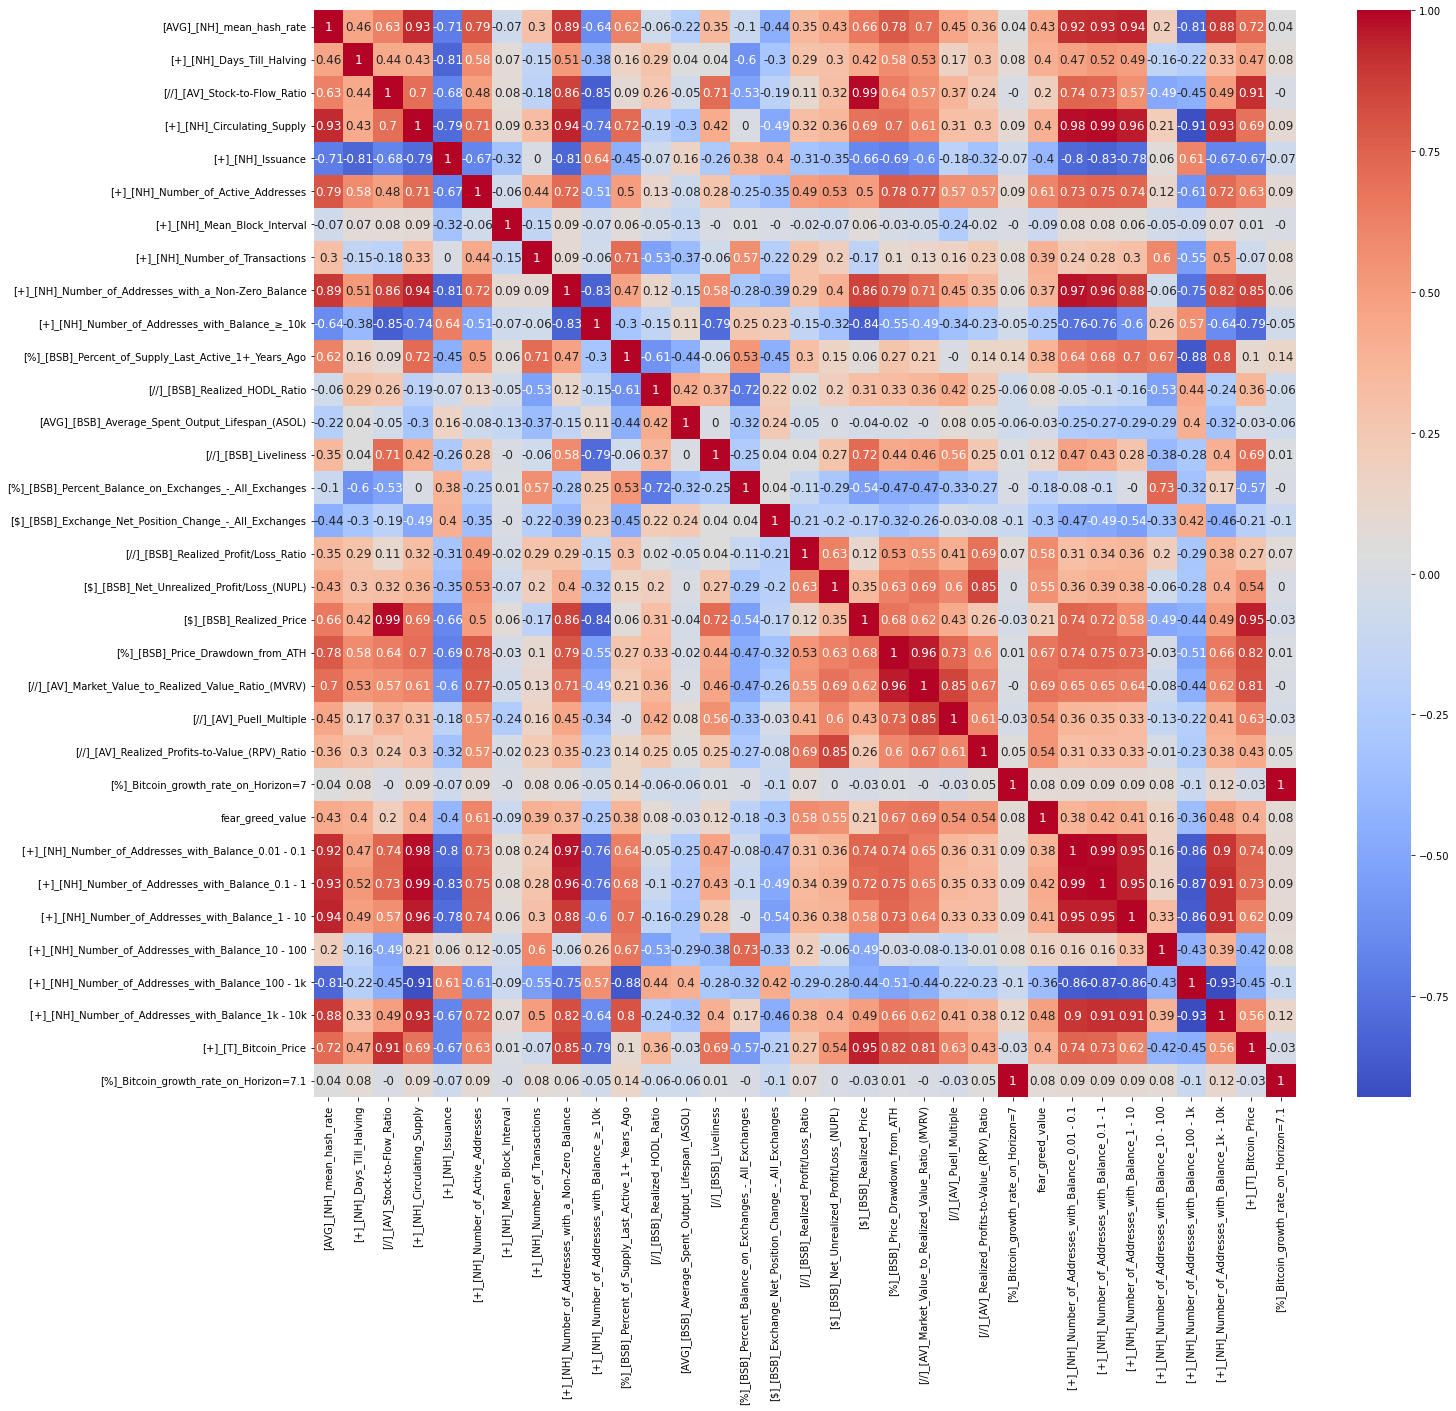

In [19]:
plt.figure(figsize = (22,20))
sns.heatmap(round(train_df.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":12});

In [20]:
train_df.corr().style.background_gradient(cmap='coolwarm')

,[AVG]_[NH]_mean_hash_rate,[+]_[NH]_Days_Till_Halving,[//]_[AV]_Stock-to-Flow_Ratio,[+]_[NH]_Circulating_Supply,[+]_[NH]_Issuance,[+]_[NH]_Number_of_Active_Addresses,[+]_[NH]_Mean_Block_Interval,[+]_[NH]_Number_of_Transactions,[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_Balance,[+]_[NH]_Number_of_Addresses_with_Balance_≥_10k,[%]_[BSB]_Percent_of_Supply_Last_Active_1+_Years_Ago,[//]_[BSB]_Realized_HODL_Ratio,[AVG]_[BSB]_Average_Spent_Output_Lifespan_(ASOL),[//]_[BSB]_Liveliness,[%]_[BSB]_Percent_Balance_on_Exchanges_-_All_Exchanges,[$]_[BSB]_Exchange_Net_Position_Change_-_All_Exchanges,[//]_[BSB]_Realized_Profit/Loss_Ratio,[$]_[BSB]_Net_Unrealized_Profit/Loss_(NUPL),[$]_[BSB]_Realized_Price,[%]_[BSB]_Price_Drawdown_from_ATH,[//]_[AV]_Market_Value_to_Realized_Value_Ratio_(MVRV),[//]_[AV]_Puell_Multiple,[//]_[AV]_Realized_Profits-to-Value_(RPV)_Ratio,[%]_Bitcoin_growth_rate_on_Horizon=7,fear_greed_value,[+]_[NH]_Number_of_Addresses_with_Balance_0.01 - 0.1,[+]_[NH]_Number_of_Addresses_with_Balance_0.1 - 1,[+]_[NH]_Number_of_Addresses_with_Balance_1 - 10,[+]_[NH]_Number_of_Addresses_with_Balance_10 - 100,[+]_[NH]_Number_of_Addresses_with_Balance_100 - 1k,[+]_[NH]_Number_of_Addresses_with_Balance_1k - 10k,[+]_[T]_Bitcoin_Price,[%]_Bitcoin_growth_rate_on_Horizon=7.1
[AVG]_[NH]_mean_hash_rate,1.000000,0.463249,0.629304,0.927169,-0.712801,0.786284,-0.074117,0.302058,0.891591,-0.642719,0.618775,-0.064499,-0.223473,0.346633,-0.099812,-0.436845,0.352598,0.430237,0.658344,0.780710,0.701607,0.454708,0.364717,0.040287,0.425569,0.918749,0.930605,0.943424,0.195707,-0.805297,0.875414,0.719440,0.040287
[+]_[NH]_Days_Till_Halving,0.463249,1.000000,0.436866,0.429619,-0.806056,0.578606,0.065288,-0.149963,0.509130,-0.375290,0.157318,0.289647,0.043345,0.035987,-0.600236,-0.301690,0.293135,0.304622,0.421928,0.576445,0.527764,0.167966,0.303928,0.078466,0.400436,0.468366,0.524204,0.490842,-0.161942,-0.221015,0.328016,0.468988,0.078466
[//]_[AV]_Stock-to-Flow_Ratio,0.629304,0.436866,1.000000,0.699114,-0.677327,0.480246,0.079940,-0.175754,0.862252,-0.854818,0.093373,0.263993,-0.049393,0.706719,-0.526405,-0.188825,0.111765,0.315212,0.987655,0.641723,0.567439,0.371786,0.236555,-0.002152,0.199319,0.740555,0.728599,0.567451,-0.491705,-0.454533,0.488206,0.906993,-0.002152
[+]_[NH]_Circulating_Supply,0.927169,0.429619,0.699114,1.000000,-0.785888,0.713864,0.086502,0.326340,0.937225,-0.742942,0.722878,-0.187891,-0.300747,0.416767,0.003272,-0.487680,0.321386,0.363360,0.692426,0.700705,0.606142,0.311548,0.303061,0.085130,0.397213,0.983180,0.988814,0.956500,0.213877,-0.910185,0.927949,0.692385,0.085130
[+]_[NH]_Issuance,-0.712801,-0.806056,-0.677327,-0.785888,1.000000,-0.667848,-0.320468,0.001851,-0.811983,0.642440,-0.448837,-0.071333,0.158610,-0.263890,0.376395,0.403325,-0.307613,-0.348303,-0.661773,-0.685477,-0.601245,-0.176188,-0.320841,-0.072187,-0.395923,-0.796370,-0.833541,-0.777053,0.062784,0.611022,-0.672405,-0.668343,-0.072187
[+]_[NH]_Number_of_Active_Addresses,0.786284,0.578606,0.480246,0.713864,-0.667848,1.000000,-0.056850,0.435982,0.721753,-0.507995,0.502994,0.127484,-0.075966,0.277955,-0.250108,-0.352278,0.490178,0.530244,0.501975,0.777829,0.767619,0.568422,0.568438,0.085660,0.608574,0.727494,0.752606,0.742655,0.117773,-0.605229,0.724160,0.630475,0.085660
[+]_[NH]_Mean_Block_Interval,-0.074117,0.065288,0.079940,0.086502,-0.320468,-0.056850,1.000000,-0.151192,0.086153,-0.065260,0.060282,-0.048855,-0.127782,-0.002470,0.006885,-0.003950,-0.022173,-0.070328,0.062122,-0.031807,-0.048268,-0.236834,-0.023886,-0.003636,-0.088705,0.080949,0.082551,0.063097,-0.053289,-0.085351,0.067485,0.013416,-0.003636
[+]_[NH]_Number_of_Transactions,0.302058,-0.149963,-0.175754,0.326340,0.001851,0.435982,-0.151192,1.000000,0.094851,-0.060986,0.710054,-0.530734,-0.369053,-0.064918,0.573600,-0.216038,0.286636,0.204831,-0.173771,0.100305,0.127494,0.161846,0.231068,0.077359,0.391888,0.242317,0.277630,0.299953,0.597648,-0.553077,0.500145,-0.067909,0.077359
[+]_[NH]_Number_of_Addr

## Running models

In [21]:
# Instanciate Grid Search
for counter in range(50):
    alpha = 75 * random()
    l1 = random()
    # Instanciate model
    model = LinearRegressionBaselineModel(alpha = alpha, l1_ratio = l1)
    # Train and Fit data using the crossval
    train(model,train_df)
    None

 12%|█████▌                                      | 4/32 [00:00<00:00, 31.50it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 33.84it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 34.30it/s]

[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0

 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 33.65it/s]

[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]
[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0

100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 33.70it/s]


[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.04it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.76it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.40it/s]

[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.95it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 33.37it/s]

[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]
[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 33.32it/s]

[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 33.01it/s]


[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 33.47it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 34.16it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 33.40it/s]

[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 33.68it/s]

[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 33.49it/s]

[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 33.70it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 33.75it/s]

[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 33.40it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 33.25it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.87it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 33.43it/s]

[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 33.28it/s]

[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 33.60it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 33.72it/s]

[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]
[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 33.65it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 33.31it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 31.58it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 33.07it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 33.39it/s]

[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 33.26it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.79it/s]

[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 32.82it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 33.04it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.76it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 33.32it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.87it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 33.13it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 33.17it/s]

[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 33.31it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 33.35it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 33.43it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 33.37it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.52it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 33.04it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 33.20it/s]

[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 33.19it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 33.29it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 33.24it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 33.38it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 33.20it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 30.76it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 31.85it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.19it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.53it/s]

[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.76it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 33.01it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 32.94it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.68it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 30.77it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 31.85it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.25it/s]

[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.34it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.54it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 31.41it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 30.92it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 31.51it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]


  9%|████▏                                       | 3/32 [00:00<00:00, 29.54it/s]

[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]


 22%|█████████▋                                  | 7/32 [00:00<00:00, 30.92it/s]

[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]


 34%|██████████████▊                            | 11/32 [00:00<00:00, 32.06it/s]

[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 47%|████████████████████▏                      | 15/32 [00:00<00:00, 32.21it/s]

[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 59%|█████████████████████████▌                 | 19/32 [00:00<00:00, 31.27it/s]

[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 72%|██████████████████████████████▉            | 23/32 [00:00<00:00, 30.45it/s]

[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]
[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]


 84%|████████████████████████████████████▎      | 27/32 [00:00<00:00, 31.45it/s]

[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 31.52it/s]


[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 31.55it/s]

[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 31.61it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 31.27it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 31.84it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.35it/s]

[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 32.56it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 32.96it/s]

[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.42it/s]


[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 31.96it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.14it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.64it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.89it/s]

[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.92it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 33.19it/s]

[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]
[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 33.00it/s]

[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.98it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.44it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.89it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 33.29it/s]

[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 33.25it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 30.13it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 30.58it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.05it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 31.60it/s]


[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]


  6%|██▊                                         | 2/32 [00:00<00:01, 17.94it/s]

[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 16%|██████▉                                     | 5/32 [00:00<00:01, 21.28it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:01, 22.30it/s]

[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 25.86it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 27.74it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 29.16it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 29.98it/s]

[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]
[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:01<00:00, 30.48it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 27.98it/s]


[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]


 19%|████████▎                                   | 6/32 [00:00<00:00, 27.62it/s]

[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]


 41%|█████████████████▍                         | 13/32 [00:00<00:00, 30.10it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 53%|██████████████████████▊                    | 17/32 [00:00<00:00, 30.37it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 66%|████████████████████████████▏              | 21/32 [00:00<00:00, 30.86it/s]

[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 78%|█████████████████████████████████▌         | 25/32 [00:00<00:00, 31.24it/s]

[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]
[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]


 91%|██████████████████████████████████████▉    | 29/32 [00:00<00:00, 30.73it/s]

[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 30.09it/s]


[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 31.14it/s]

[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 31.76it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 30.33it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]

 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 30.25it/s]


[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 30.47it/s]

[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 30.48it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 29.39it/s]

[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 30.06it/s]


[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.02it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 31.58it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 31.61it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 31.77it/s]

[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 31.74it/s]

[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 30.58it/s]

[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]
[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 30.41it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 31.00it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.24it/s]

[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 31.37it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 30.97it/s]

[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 30.61it/s]

[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 31.15it/s]

[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 31.11it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.35it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 31.21it/s]


[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 30.59it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 30.84it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 30.75it/s]

[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 30.76it/s]

[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 31.22it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 30.88it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.00it/s]

[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 31.11it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 31.99it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 31.89it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.47it/s]

[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.53it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.93it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 32.37it/s]

[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]
[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 32.56it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.46it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.11it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.47it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.30it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 30.33it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 31.24it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 31.20it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.74it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 31.61it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.46it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.04it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 31.97it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 31.87it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.02it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 31.60it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.75it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 31.86it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 31.00it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 31.77it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.30it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.58it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.72it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 32.26it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 32.24it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.31it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.82it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.80it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.89it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.56it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.72it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 32.20it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 32.17it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.35it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.27it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.29it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.32it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.52it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.54it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 32.02it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 32.22it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.17it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]


  9%|████▏                                       | 3/32 [00:00<00:00, 29.41it/s]

[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 22%|█████████▋                                  | 7/32 [00:00<00:00, 31.33it/s]

[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 34%|██████████████▊                            | 11/32 [00:00<00:00, 32.18it/s]

[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 47%|████████████████████▏                      | 15/32 [00:00<00:00, 32.67it/s]

[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]


 59%|█████████████████████████▌                 | 19/32 [00:00<00:00, 32.93it/s]

[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 72%|██████████████████████████████▉            | 23/32 [00:00<00:00, 32.47it/s]

[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]
[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]


 84%|████████████████████████████████████▎      | 27/32 [00:00<00:00, 31.84it/s]

[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]


 97%|█████████████████████████████████████████▋ | 31/32 [00:00<00:00, 31.50it/s]

[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 31.85it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 31.99it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.88it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.62it/s]

[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.70it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.25it/s]

[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 31.35it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.76it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 31.98it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 33.30it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.44it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.60it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.73it/s]

[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.82it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 32.39it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 32.16it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.49it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.85it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.45it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.29it/s]

[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.35it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.39it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 31.81it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.78it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 31.98it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 31.94it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 31.67it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 31.78it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 31.90it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 31.94it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 31.68it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.67it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 31.73it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 31.59it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 31.95it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 31.83it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 31.92it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.05it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 31.81it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.92it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.01it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.23it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.08it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 31.87it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 31.95it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 31.84it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 30.84it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.26it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 31.58it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.36it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 31.95it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.13it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.25it/s]

[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.03it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 31.72it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.63it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.00it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.58it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.95it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 33.23it/s]

[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 33.20it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 33.22it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 32.48it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 32.10it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.50it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.52it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.21it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.31it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.51it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.52it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 32.00it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.79it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.09it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.70it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.42it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.32it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.43it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.37it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 31.91it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.73it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.01it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 31.97it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 31.96it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 31.90it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.09it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.01it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 31.77it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.94it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.04it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.08it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.47it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.44it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.46it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.60it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 32.06it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.90it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.13it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.37it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.50it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.63it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.58it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.60it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 31.64it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.52it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.02it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.51it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.59it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.58it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.59it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.60it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 32.09it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 32.19it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.35it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.70it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.63it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.08it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 31.92it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 31.91it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 31.57it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.45it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 31.59it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.52it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.31it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 31.99it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.11it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.11it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 31.84it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.73it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 31.90it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.26it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 31.34it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 30.50it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 31.25it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 31.34it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 31.34it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.74it/s]

[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 31.54it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 33.05it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.70it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.58it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.49it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.47it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 32.30it/s]

[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]
[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 32.30it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.46it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.56it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.55it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.16it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.45it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.19it/s]

[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 31.63it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 32.17it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.15it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.34it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.22it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.04it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.25it/s]

[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]
[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.26it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 31.98it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.90it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.16it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.27it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.35it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.58it/s]

[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.43it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 32.36it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 31.92it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.50it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 31.98it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.50it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.27it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 31.89it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 31.92it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 31.62it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 31.40it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.73it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 31.77it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.28it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 31.66it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 31.60it/s]

[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 31.90it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 31.84it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 30.98it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 31.25it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:01<00:00, 31.61it/s]


[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


  0%|                                                    | 0/32 [00:00<?, ?it/s]

[-0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
[-0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.]
[-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.]


 12%|█████▌                                      | 4/32 [00:00<00:00, 32.34it/s]

[-0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
[ 0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[-0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


 25%|███████████                                 | 8/32 [00:00<00:00, 32.45it/s]

[-0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]


 38%|████████████████▏                          | 12/32 [00:00<00:00, 32.25it/s]

[-0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.]


 50%|█████████████████████▌                     | 16/32 [00:00<00:00, 32.03it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[ 0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.]
[-0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]


 62%|██████████████████████████▉                | 20/32 [00:00<00:00, 31.76it/s]

[-0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[-0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.]


 75%|████████████████████████████████▎          | 24/32 [00:00<00:00, 31.94it/s]

[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]
[ 0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
[ 0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.]


 88%|█████████████████████████████████████▋     | 28/32 [00:00<00:00, 32.27it/s]

[-0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
[-0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 32.15it/s]

[-0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Training done


In [22]:
df_result = read_result()

In [23]:
df_result.sort_values(by="mean_score")

KeyError: 'mean_score'

In [ ]:
# Instanciate model
model = DummyModel()
# Train and Fit data using the crossval
train(model,train_df)
None

In [ ]:
df_result = read_result()

In [ ]:
df_result.sort_values(by="mean_score")

In [ ]:
# take mean on the week on linear regression and inspect the weights
# create a btc trajectory on linear trend +2% (test unitaire) => check outcome of strategies in a basic situation
# y_diff to try to improve MAPE
# Check colinearity on coefficients => heatmap ?
# RNN, can try with less features from 2015 if we lack of samples (263 sized sequences, might not be enough)
# l1 is a feature selector that can help tune the RNN
#Feature importance
#if you don't have enough variance, you can leave them out
#Vif analysis on X
#checking the y permutation importance (suffling and checking impact on R2)
#Reco => vif on features & lasso importance
#shuffle on each folds axis = 0 np.array.shuffle()


In [ ]:
# Instanciate Grid Search
for counter in range(5):
    l1 = random() / 10
    l2 = random() / 10
    # Instanciate model
    model = RnnDlModel(L1 = l1, L2 = l2)
    # Train and Fit data using the crossval
    train(model,train_df)
    None

In [ ]:
df_result = read_result()
df_result.sort_values(by="mean_score")